### Assignment Part - I

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Also, determine the optimal value of lambda for ridge and lasso regression.

 

### Business Goal:
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps:
* Data Understanding and Exploration
    *univariate and bivariate
* Data Cleaning
* Missing Value imputation
    * Removing duplicates
    * Outlier Treatment
    * Dummy Variables
* Data Preparation
* Model building and Evaluation
* Observation

In [187]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

In [188]:
df = pd.read_csv("D:\\MSC_Works\\github\\surprise housing\\train.csv")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,...,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,...,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,...,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,...,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [189]:
# describing the data
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [190]:
# info the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [191]:
print("The shape of the data")
print(df.shape)

print(f'Count of Empty Rows : {df.isnull().all(axis=1).sum()}')
print(f'Count of Empty Columns : {df.isnull().all(axis=0).sum()}')
print(f'Count of NAN Columns : {df.isna().all(axis=0).sum()}')
print(f"No duplicates: {sum(df.duplicated(subset='Id')) == 0}")

#Observations:
##data has 1460 rows
##Data consists of 81 columns
###There are no empty rows and empty columns
### There are no duplicates

The shape of the data
(1460, 81)
Count of Empty Rows : 0
Count of Empty Columns : 0
Count of NAN Columns : 0
No duplicates: True


### Null's handling 

In [192]:

null_per_df = pd.DataFrame(((df.isnull().sum()/len(df.index))*100).sort_values(ascending=False),columns=['percent'])
null_df=null_per_df[null_per_df['percent']>0]
print(f'Number of columns with null values :{null_df.shape[0]}')
print(f'Columns with null values :{null_df.index.to_list()}')

Number of columns with null values :19
Columns with null values :['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 'Electrical']


In [193]:
null_df

,percent
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945


In [194]:
# There are 4 columns with null percentage greater than 80. hence, they be dropped 

print(f'Columns with null values > 80% before dropping :{df.columns}, Number of columns : {df.shape[1]}')
df = df.drop(null_df[null_df.percent>80].index.to_list(),axis=1)


Columns with null values > 80% before dropping :Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPo

In [195]:
print(f'Columns with null values > 80  after dropping :{df.columns}')
print(f' Number of columns after dropping : {df.shape[1]}')

Columns with null values > 80  after dropping :Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

In [196]:
null_df = null_df[null_df.percent<80]
null_df

,percent
MasVnrType,59.726027
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageCond,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945
BsmtFinType2,2.602740
BsmtExposure,2.602740


In [197]:
#Identifying numeric columns with nulls
df[null_df.index.to_list()].info()
#observation : Numeric columns:  MasVnrArea, LotFrontage,GarageYrBlt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MasVnrType    588 non-null    object 
 1   FireplaceQu   770 non-null    object 
 2   LotFrontage   1201 non-null   float64
 3   GarageYrBlt   1379 non-null   float64
 4   GarageCond    1379 non-null   object 
 5   GarageType    1379 non-null   object 
 6   GarageFinish  1379 non-null   object 
 7   GarageQual    1379 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   BsmtExposure  1422 non-null   object 
 10  BsmtQual      1423 non-null   object 
 11  BsmtCond      1423 non-null   object 
 12  BsmtFinType1  1423 non-null   object 
 13  MasVnrArea    1452 non-null   float64
 14  Electrical    1459 non-null   object 
dtypes: float64(3), object(12)
memory usage: 171.2+ KB


In [198]:
#Numeric columns : null handling (replacing with median)
numerical_column = df[null_df.index.to_list()].select_dtypes(exclude='object').columns.to_list()

def show_median(column):
    print(f'Median Value of the {column} : {df[column].median()}')
    print(df[column].describe())
    print()
    
[show_median(each_column) for each_column in numerical_column]


Median Value of the LotFrontage : 69.0
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Median Value of the GarageYrBlt : 1980.0
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Median Value of the MasVnrArea : 0.0
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64



[None, None, None]

In [199]:
def impute_median(df, column):
    print(f"Imputing missing values in {column}")
    missing_values_before = df[column].isna().sum()
    df[column].fillna(df[column].median(), inplace=True)
    missing_values_after = df[column].isna().sum()
    print(f"Before: {missing_values_before} missing values")
    print(f"After: {missing_values_after} missing values")
    print()

# Assuming numerical_column is a list of numerical column names
for column in numerical_column:
    impute_median(df, column)


Imputing missing values in LotFrontage
Before: 259 missing values
After: 0 missing values

Imputing missing values in GarageYrBlt
Before: 81 missing values
After: 0 missing values

Imputing missing values in MasVnrArea
Before: 8 missing values
After: 0 missing values



In [200]:
df[numerical_column].describe()

,LotFrontage,GarageYrBlt,MasVnrArea
count,1460.000000,1460.000000,1460.000000
mean,69.863699,1978.589041,103.117123
std,22.027677,23.997022,180.731373
min,21.000000,1900.000000,0.000000
25%,60.000000,1962.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,79.000000,2001.000000,164.250000
max,313.000000,2010.000000,1600.000000


In [201]:
df.isnull().values.any()

True

In [202]:
#Categorical columns : null handling (replacing with mode)

categorical_column = df[null_df.index.to_list()].select_dtypes(include='object').columns.to_list()
print(categorical_column)

def print_mode(column):
    mode_value = df[column].mode()[0]
    print(f"Mode Value of {column}: {mode_value}")
    print(df[column].describe())
    print()

def impute_mode(df, column):
    print(f"Imputing mode value in {column}:")
    missing_values_before = df[column].isna().sum()
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
    missing_values_after = df[column].isna().sum()
    print(f"Before: {missing_values_before} missing values")
    print(f"After: {missing_values_after} missing values")
    print_mode(column)
    print()

# Loop over categorical columns
for column in categorical_column:
    impute_mode(df, column)

['MasVnrType', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Electrical']
Imputing mode value in MasVnrType:
Before: 872 missing values
After: 0 missing values
Mode Value of MasVnrType: BrkFace
count        1460
unique          3
top       BrkFace
freq         1317
Name: MasVnrType, dtype: object


Imputing mode value in FireplaceQu:
Before: 690 missing values
After: 0 missing values
Mode Value of FireplaceQu: Gd
count     1460
unique       5
top         Gd
freq      1070
Name: FireplaceQu, dtype: object


Imputing mode value in GarageCond:
Before: 81 missing values
After: 0 missing values
Mode Value of GarageCond: TA
count     1460
unique       5
top         TA
freq      1407
Name: GarageCond, dtype: object


Imputing mode value in GarageType:
Before: 81 missing values
After: 0 missing values
Mode Value of GarageType: Attchd
count       1460
unique         6
top       Attchd
freq       

In [203]:
# Get column names with null values
null_column_names = df.columns[df.isna().any()].tolist()

if null_column_names:
    print("Columns with null values:", null_column_names)
else:
    print("There are no columns with null values.")

#Null handling is done. 

#Drop ID column, since its not having any business value
df = df.drop(columns='Id',axis=1)


There are no columns with null values.


### Outliner detection 

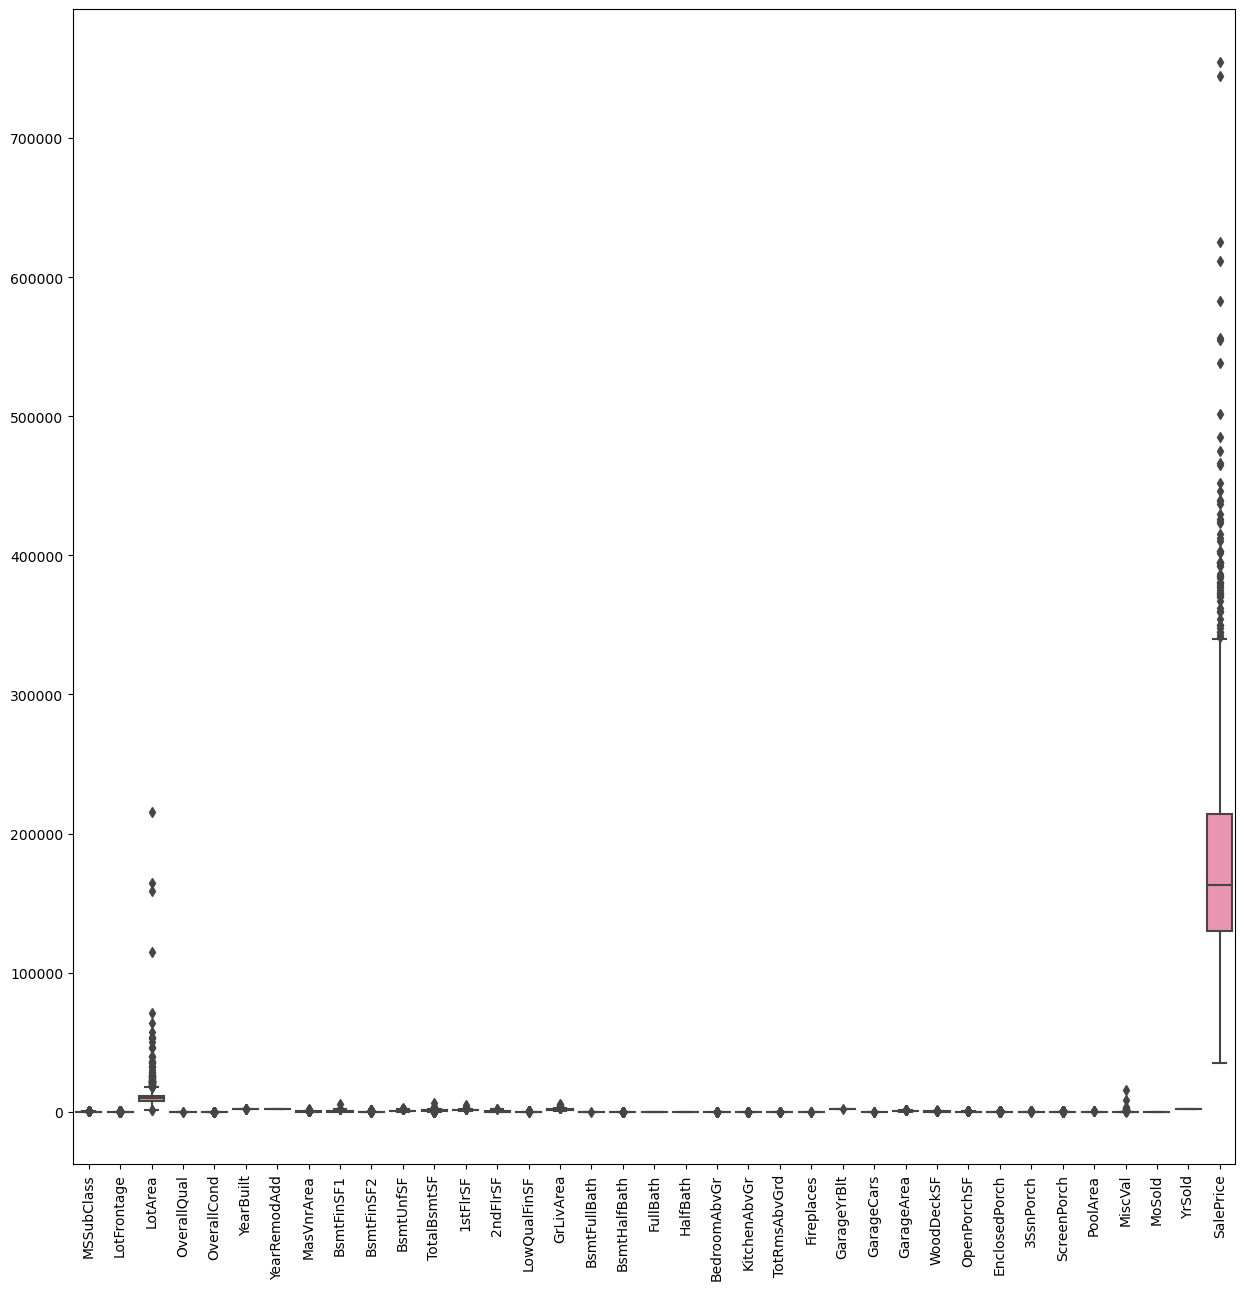

In [204]:
#Find out if data has outliers


df_numeric_col = df.select_dtypes(exclude = 'object')

col_val = 1
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric_col);

In [205]:
#Fixing outliners
for col in df_numeric_col.columns:
    df_numeric_col[col][df_numeric_col[col] <= df_numeric_col[col].quantile(0.05)] = df_numeric_col[col].quantile(0.05)
    df_numeric_col[col][df_numeric_col[col] >= df_numeric_col[col].quantile(0.95)] = df_numeric_col[col].quantile(0.95)

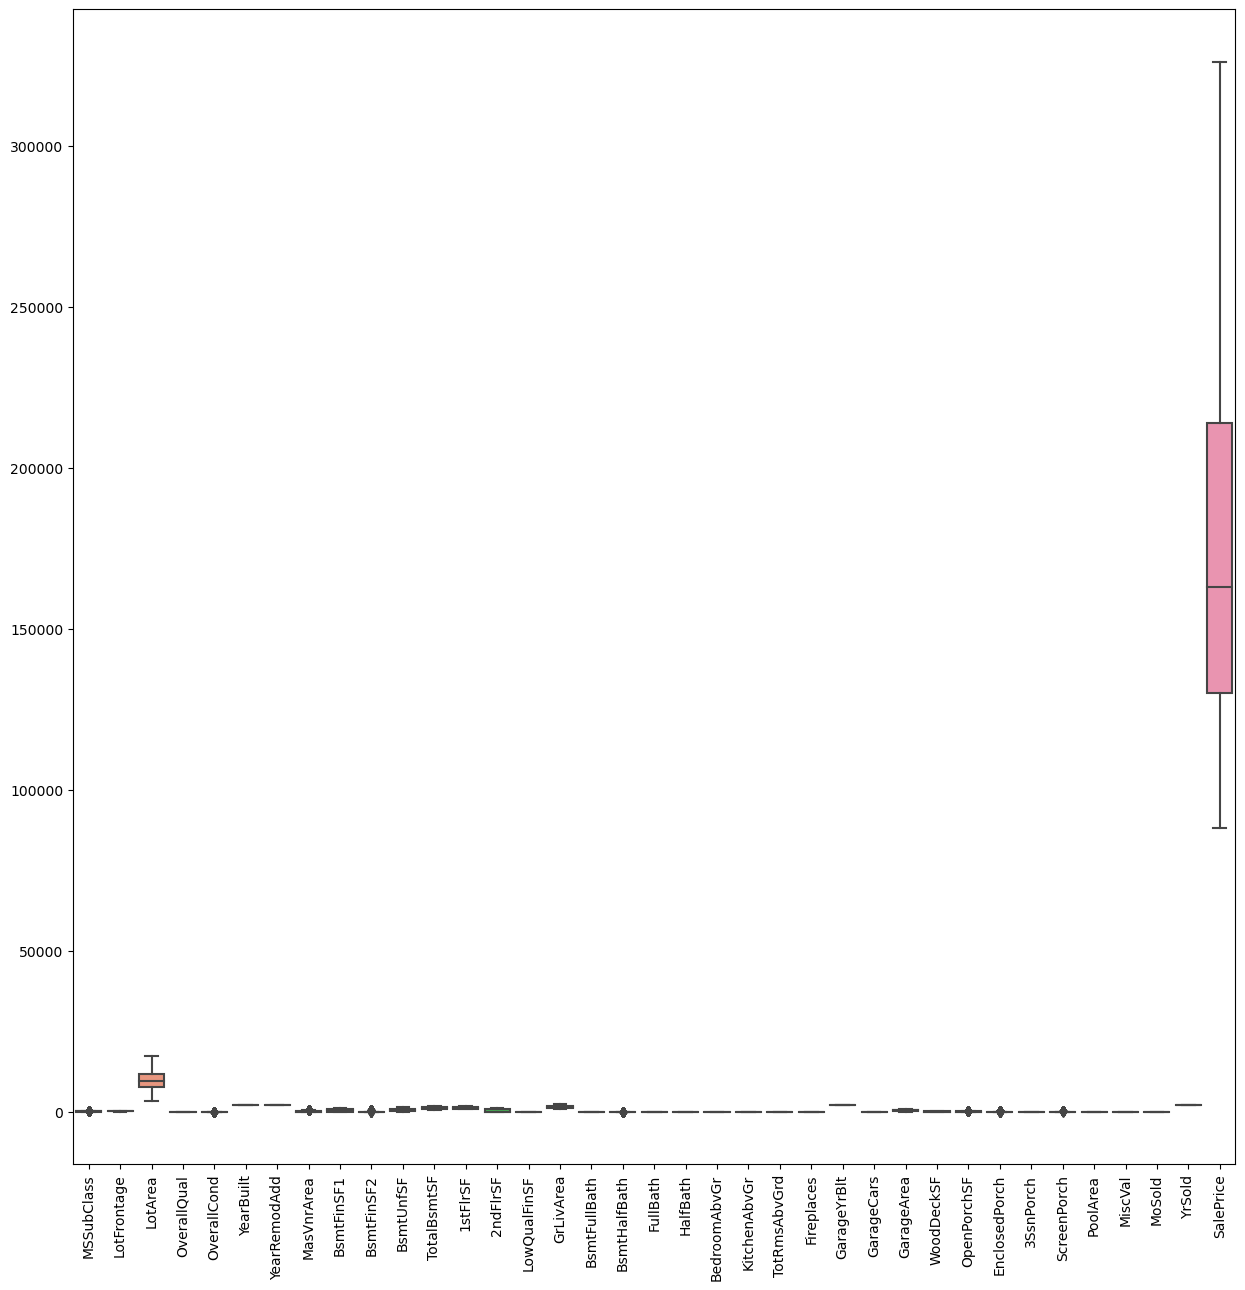

In [206]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.boxplot(data=df_numeric_col);

In [207]:
df[df.columns.to_list()].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.

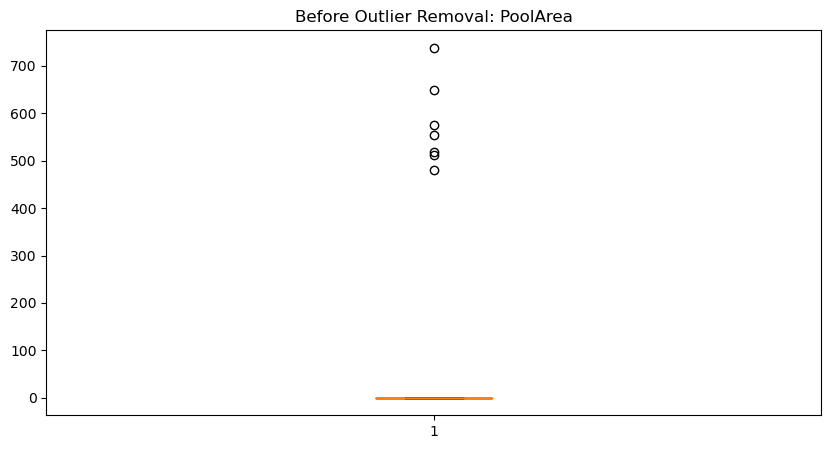

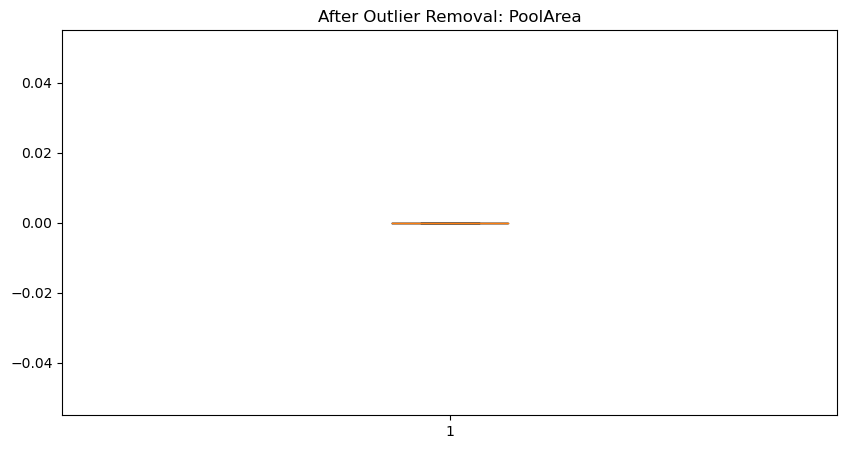

Shape after outlier removal for PoolArea: (1453, 76)


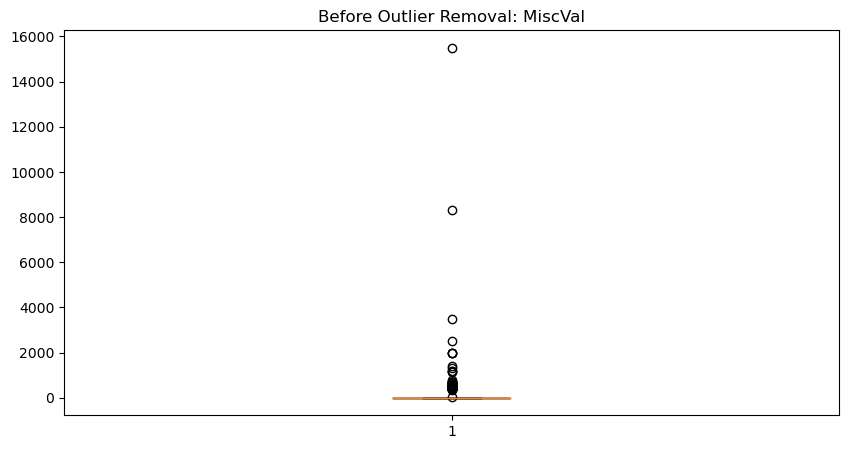

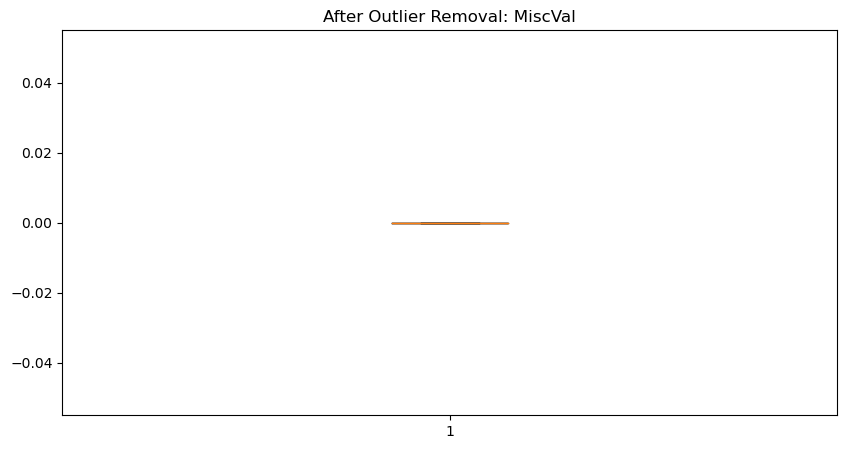

Shape after outlier removal for MiscVal: (1402, 76)


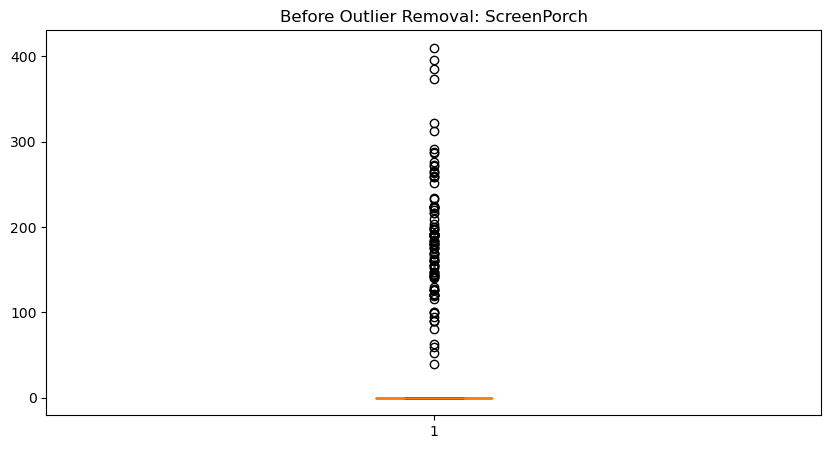

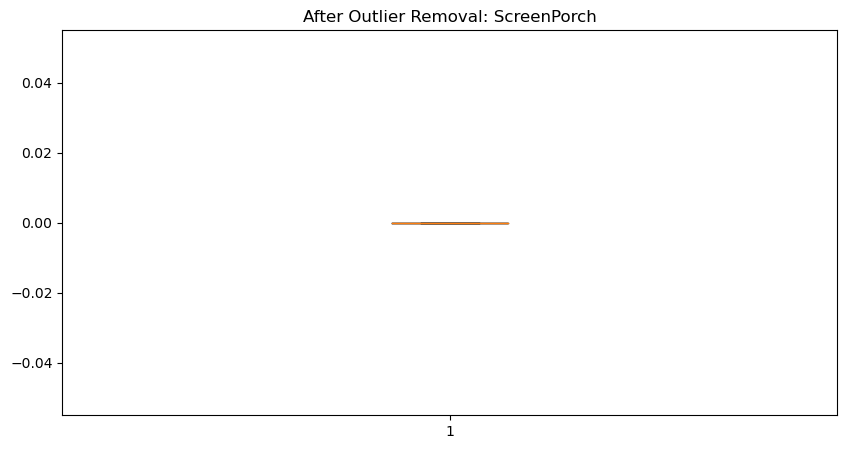

Shape after outlier removal for ScreenPorch: (1291, 76)


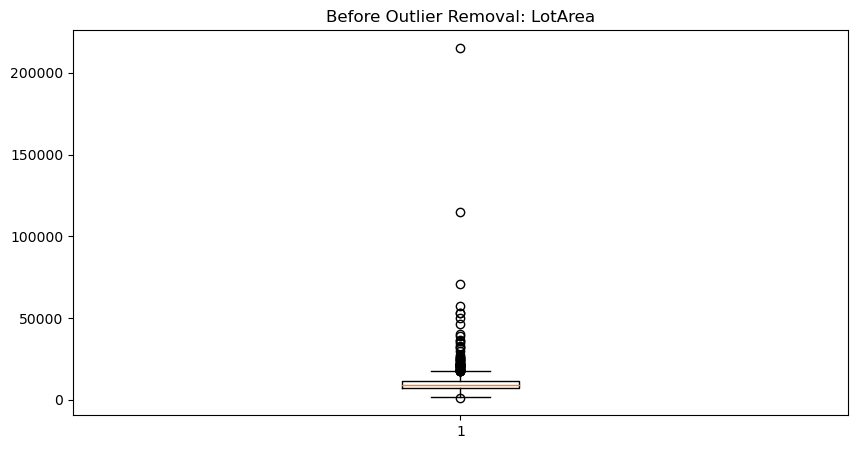

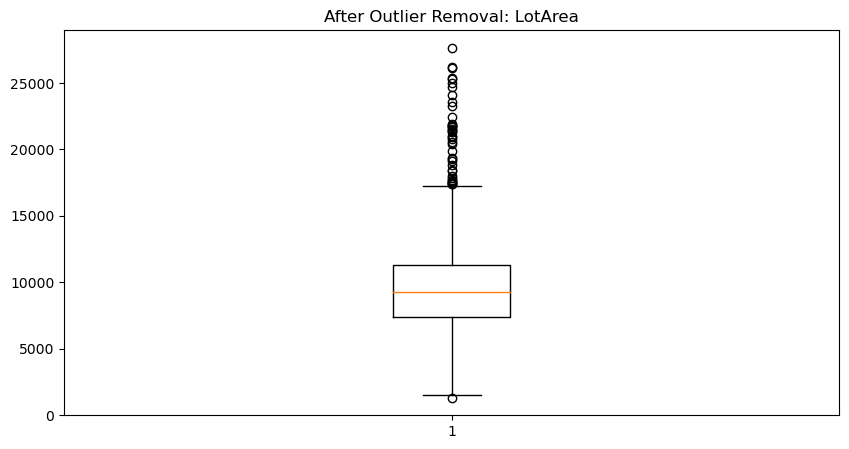

Shape after outlier removal for LotArea: (1274, 76)


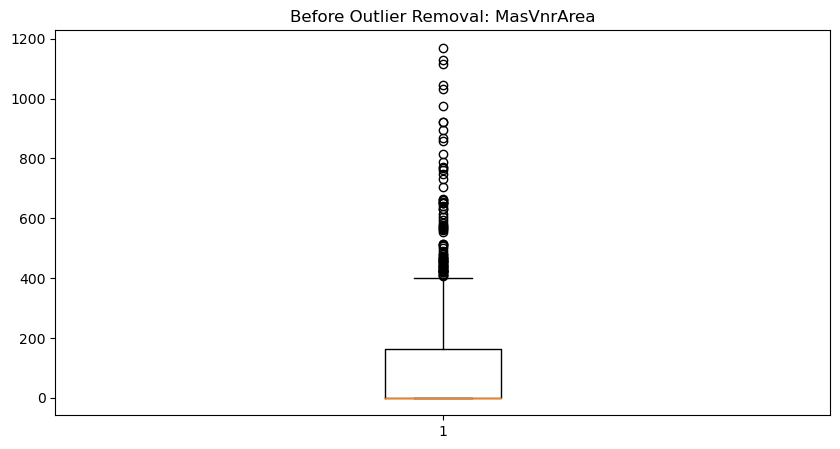

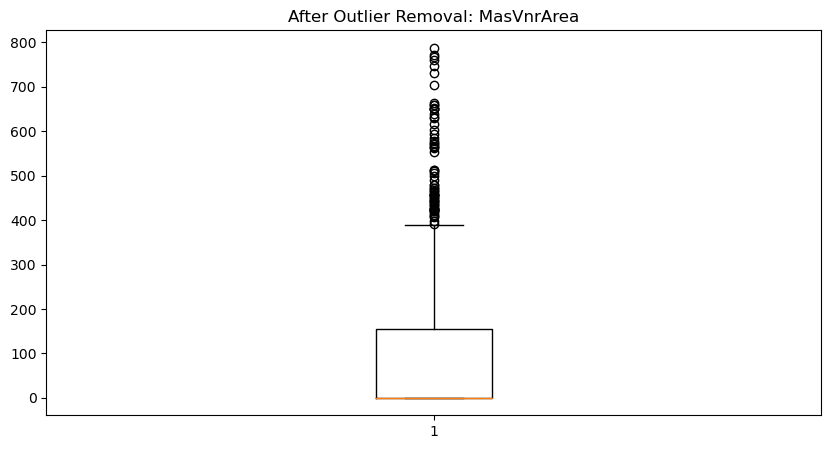

Shape after outlier removal for MasVnrArea: (1262, 76)


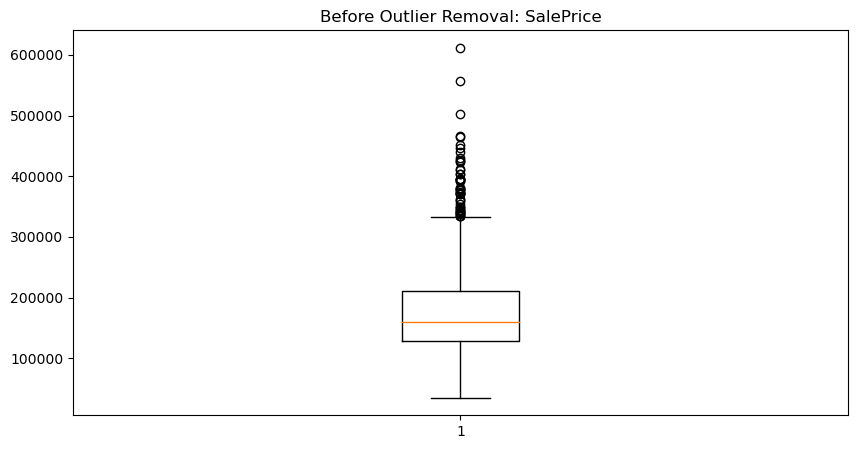

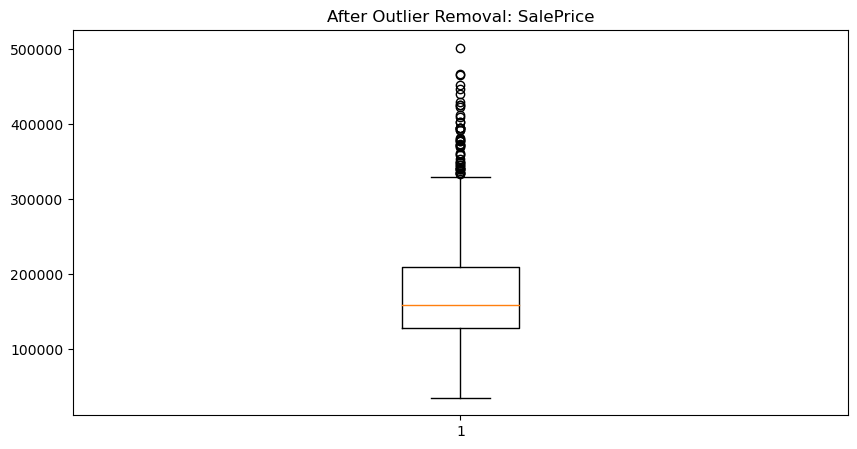

Shape after outlier removal for SalePrice: (1260, 76)


In [208]:
#outlier removal before and after

#Based on the above results more variation is observed for the below fields while comparing 99% vs max and 25% vs min
#columns : ['PoolArea', 'MiscVal', 'ScreenPorch', 'LotArea', 'MasVnrArea', 'SalePrice']
import matplotlib.pyplot as plt

# List of columns to analyze
columns_to_analyze = ['PoolArea', 'MiscVal', 'ScreenPorch', 'LotArea', 'MasVnrArea', 'SalePrice']  # Add more columns as needed

# Loop through each column
for column in columns_to_analyze:
    # Plot boxplot before outlier removal
    plt.figure(figsize=[10, 5])
    plt.boxplot(df[column])
    plt.title(f'Before Outlier Removal: {column}')
    plt.show()

    # Calculate quartiles and IQR
    q1 = df[column].quantile(0.1)
    q3 = df[column].quantile(0.9)
    IQR = q3 - q1

    # Remove outliers
    df = df[(df[column] >= q1 - 1.5*IQR) & 
                                (df[column] <= q3 + 1.5*IQR)]

    # Plot boxplot after outlier removal
    plt.figure(figsize=[10, 5])
    plt.boxplot(df[column])
    plt.title(f'After Outlier Removal: {column}')
    plt.show()

    # Print shape after outlier removal
    print(f"Shape after outlier removal for {column}: {df.shape}")


In [209]:
#after outliner removal
df[df.columns.to_list()].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.0,1260.0,1260.0,1260.000000,1260.000000,1260.000000
mean,57.519841,68.909524,9452.410317,6.066667,5.549206,1971.957143,1985.277778,91.087302,417.009524,42.195238,575.107937,1034.312698,1138.953175,340.095238,5.597619,1484.646032,0.411111,0.052381,1.565873,0.372222,2.857143,1.049206,6.473016,0.555556,1979.313492,1.748413,465.792063,92.342063,45.888889,22.984127,3.696825,0.0,0.0,0.0,6.328571,2007.796825,175884.996825
std,42.840233,20.947184,3787.101796,1.362262,1.102366,30.674360,20.798339,148.295147,418.018289,151.637946,445.630791,404.486903,362.803964,426.403362,47.369075,483.622065,0.511228,0.229899,0.537352,0.498152,0.809144,0.227130,1.594790,0.609112,24.098869,0.756884,212.887068,119.805182,63.596177,61.396365,30.240920,0.0,0.0,0.0,2.692910,1.324297,70983.989942
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7338.000000,5.000000,5.000000,1953.000000,1967.000000,0.000000,0.000000,0.000000,218.750000,788.750000,864.000000,0.000000,0.000000,1121.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5.000000,2007.000000,128000.000000
50%,50.000000,69.000000,9200.000000,6.000000,5.000000,1975.000000,1994.500000,0.000000,355.000000,0.000000,489.000000,975.000000,1067.000000,0.000000,0.000000,1441.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1980.000000,2.000000,474.000000,0.000000,25.000000,0.000000,0.000000,0.0,0.0,0.0,6.000000,2008.000000,159000.000000
75%,70.000000,78.000000,11256.250000,7.000000,6.000000,2002.000000,2004.000000,153.250000,696.250000,0.000000,816.500000,1268.250000,1362.000000,721.250000,0.000000,1752.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.0,0.0,0.0,8.000000,2009.000000,210000.000000
90%,120.000000,90.000000,13714.800000,8.000000,7.000000,2006.000000,2007.000000,305.100000,1013.100000,64.400000,1252.500000,1575.500000,1654.200000,930.200000,0.000000,2110.200000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,8.100000,1.000000,2006.000000,3.000000,750.000000,252.100000,130.000000,114.000000,0.000000,0.0,0.0,0.0,10.000000,2010.000000,271910.000000
95%,160.000000,100.050000,16034.300000,8.000000,8.000000,2007.000000,2007.000000,415.250000,1218.100000,375.250000,1480.100000,1728.000000,1787.050000,1121.050000,0.000000,2392.300000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,9.000000,2.000000,2007.000000,3.000000,842.050000,322.000000,169.050000,184.000000,0.000000,0.0,0.0,0.0,11.000000,2010.000000,319905.000000
99%,190.000000,130.000000,21800.020000,9.000000,9.000000,2009.000000,2009.000000,644.100000,1461.640000,717.100000,1784.380000,2043.640000,2114.640000,1338.150000,285.660000,2846.040000,1.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.0000

In [210]:
corr = df.select_dtypes(include='number').corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.392818,-0.399841,0.030396,-0.057920,0.019968,0.031368,0.025990,-0.087413,-0.060876,-0.134808,-0.261680,-0.269266,0.318013,0.048040,0.083095,0.009601,-0.019057,0.130712,0.187143,-0.022488,0.282747,0.044331,-0.038471,0.078951,-0.052941,-0.117229,-0.031867,0.000964,-0.011218,-0.049040,NaN,NaN,NaN,-0.027837,-0.014769,-0.100368
LotFrontage,-0.392818,1.000000,0.571357,0.214122,-0.048341,0.126451,0.092323,0.150697,0.110901,0.033889,0.139991,0.281546,0.356146,0.044747,0.017989,0.308389,0.050352,-0.018477,0.178072,0.037407,0.253652,0.006613,0.306024,0.202401,0.075645,0.274001,0.298585,0.086694,0.104888,-0.008925,0.072683,NaN,NaN,NaN,0.049106,0.018149,0.348865
LotArea,-0.399841,0.571357,1.000000,0.190943,-0.022949,0.069175,0.049399,0.121820,0.163234,0.064946,0.098109,0.301131,0.406709,0.096021,-0.001335,0.389635,0.082555,0.023946,0.192113,0.081971,0.282359,-0.009323,0.357963,0.295759,0.023041,0.274425,0.315659,0.153050,0.125146,-0.002259,0.086873,NaN,NaN,NaN,0.027792,-0.019077,0.395210
OverallQual,0.030396,0.214122,0.190943,1.000000,-0.092631,0.582476,0.559521,0.391814,0.198012,-0.084597,0.314602,0.519524,0.453315,0.275145,-0.067997,0.576000,0.099757,-0.051738,0.562569,0.263038,0.111691,-0.190306,0.410304,0.396612,0.526344,0.605593,0.567146,0.267852,0.319284,-0.125647,0.044354,NaN,NaN,NaN,0.085394,-0.014500,0.810383
OverallCond,-0.057920,-0.048341,-0.022949,-0.092631,1.000000,-0.371823,0.068621,-0.114240,-0.024755,0.063543,-0.154036,-0.171466,-0.137936,0.018550,0.009681,-0.086173,-0.045790,0.155928,-0.211301,-0.045674,0.000763,-0.079469,-0.066562,-0.028916,-0.305712,-0.183635,-0.141224,0.010953,-0.030999,0.097300,0.036211,NaN,NaN,NaN,0.000971,0.044395,-0.086945
YearBuilt,0.019968,0.126451,0.069175,0.582476,-0.371823,1.000000,0.605392,0.315163,0.242751,-0.057843,0.160197,0.405679,0.284147,0.000393,-0.170862,0.196772,0.180731,-0.041693,0.484751,0.233708,-0.053082,-0.186210,0.086956,0.173785,0.782141,0.544898,0.492040,0.234072,0.196453,-0.416414,0.025980,NaN,NaN,NaN,0.020623,-0.014156,0.569876
YearRemodAdd,0.031368,0.092323,0.049399,0.559521,0.068621,0.605392,1.000000,0.178020,0.116813,-0.074280,0.185399,0.297132,0.235581,0.125100,-0.068174,0.280350,0.124462,-0.020321,0.449301,0.187419,-0.030867,-0.160779,0.175826,0.115774,0.636469,0.431052,0.385263,0.218568,0.254665,-0.210692,0.043984,NaN,NaN,NaN,0.032873,0.035848,0.544356
MasVnrArea,0.025990,0.150697,0.121820,0.391814,-0.114240,0.315163,0.178020,1.000000,0.216772,-0.059567,0.121408,0.335449,0.322692,0.120417,-0.072641,0.341133,0.092802,-0.002837,0.255336,0.173708,0.081397,-0.020526,0.259322,0.233742,0.247029,0.365414,0.366019,0.192018,0.121714,-0.110823,0.041980,NaN,NaN,NaN,0.031105,0.011524,0.453788
BsmtFinSF1,-0.087413,0.110901,0.163234,0.198012,-0.024755,0.242751,0.116813,0.216772,1.000000,-0.059195,-0.526597,0.431100,0.356662,-0.191286,-0.066136,0.092429,0.657465,0.045659,0.031659,-0.012749,-0.104293,-0.095232,-0.009424,0.208092,0.146876,0.202813,0.250758,0.205630,0.082723,-0.124445,0.034419,NaN,NaN,NaN,0.010409,0.035158,0.387586
BsmtFinSF2,-0.060876,0.033889,0.064946,-0.084597,0.063543,-0.057843,-0.074280,-0.059567,-0.059195,1.000000,-0.214689,0.077187,0.069166,-0.086457,0.021776,-0.022208,0.141659,0.076055,-0.070177,-0.050709,-0.003585,-0.040937,-0.040088,0.022009,-0.089538,-0.057524,-0.022511,0.079058,-0.021435,0.051422,-0.029755,NaN,NaN,NaN,-0.012721,0.025306,-0.038209


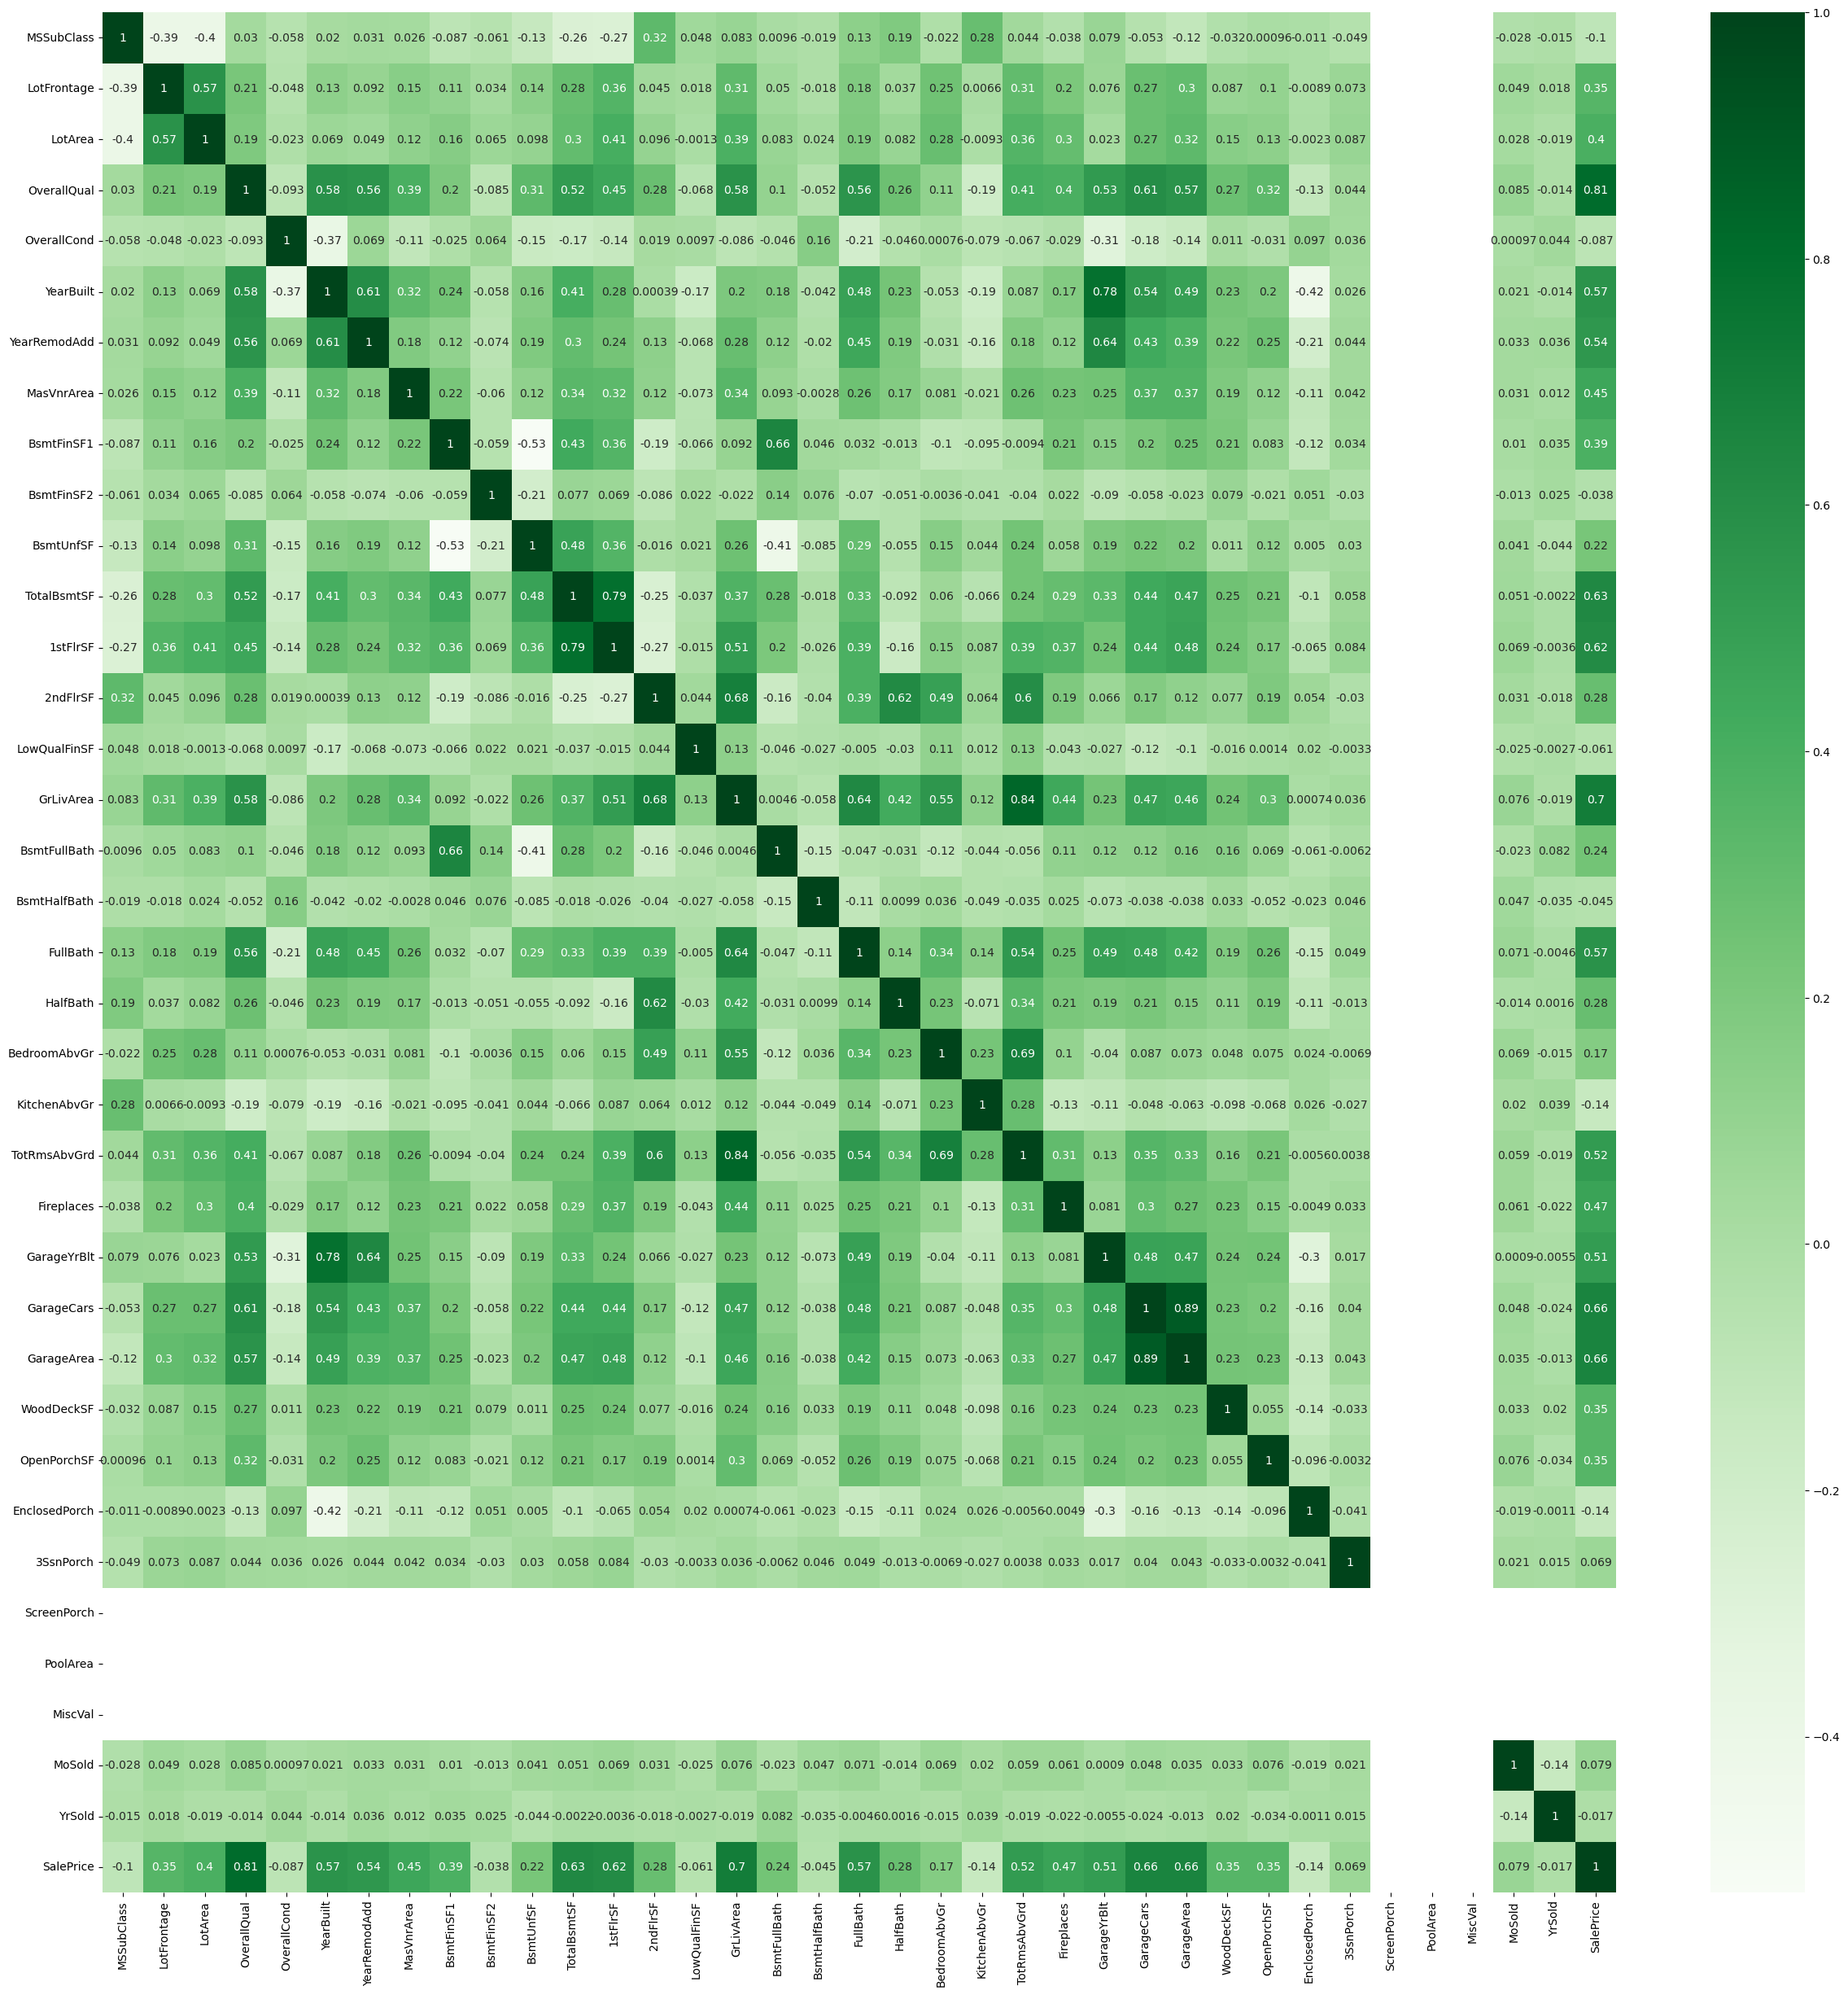

In [211]:
plt.figure(figsize=(30,30))
sns.heatmap(corr,cmap='Greens',annot=True)
plt.show()

### Dummy variables

In [212]:
categorical_columns = df.select_dtypes(include='object').columns
print(f'Categorical columns :{categorical_column}')

Categorical columns :['MasVnrType', 'FireplaceQu', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'Electrical']


In [213]:
print(df.shape)
source_data = pd.get_dummies(df, drop_first=True )
print(source_data.shape)

(1260, 76)
(1260, 229)


In [214]:
#fetch the target variable
y = source_data.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [215]:
X = source_data
X.shape

(1260, 228)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=50)
print(f'X_train.shape :{X_train.shape}')
print(f'X_test.shape :{X_test.shape}')
print(f'y_train.shape :{y_train.shape}')
print(f'y_test.shape :{y_test.shape}')

X_train.shape :(882, 228)
X_test.shape :(378, 228)
y_train.shape :(882,)
y_test.shape :(378,)


In [217]:
num_column = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns
X_train[num_column].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.0,882.0,882.0,882.000000,882.000000
mean,56.723356,68.867347,9559.253968,6.049887,5.560091,1971.351474,1985.195011,91.315193,416.724490,39.360544,579.302721,1035.387755,1140.878685,340.128118,5.597506,1486.604308,0.409297,0.057823,1.561224,0.379819,2.844671,1.051020,6.469388,0.535147,1978.874150,1.749433,461.581633,95.345805,45.929705,23.445578,3.892290,0.0,0.0,0.0,6.321995,2007.774376
std,41.991168,21.429278,3878.891599,1.355112,1.102734,31.155591,20.878451,148.959495,423.877143,147.122469,446.577204,404.732034,371.600447,423.337052,47.859235,480.432442,0.510106,0.243067,0.538204,0.503969,0.804161,0.235123,1.574367,0.604007,24.498396,0.763546,213.501506,122.969869,65.772211,62.440236,29.401846,0.0,0.0,0.0,2.729282,1.320450
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.000000,2006.000000
25%,20.000000,60.000000,7424.500000,5.000000,5.000000,1952.000000,1967.250000,0.000000,0.000000,0.000000,237.250000,780.000000,864.000000,0.000000,0.000000,1122.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,312.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,4.000000,2007.000000
50%,50.000000,69.000000,9240.500000,6.000000,5.000000,1974.000000,1994.000000,0.000000,351.500000,0.000000,499.500000,978.500000,1065.000000,0.000000,0.000000,1449.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1980.000000,2.000000,470.000000,0.000000,24.000000,0.000000,0.000000,0.0,0.0,0.0,6.000000,2008.000000
75%,70.000000,78.000000,11423.000000,7.000000,6.000000,2002.000000,2004.000000,148.750000,699.750000,0.000000,831.750000,1265.000000,1352.000000,726.000000,0.000000,1766.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.0,0.0,0.0,8.000000,2009.000000
max,190.000000,313.000000,27650.000000,10.000000,9.000000,2010.000000,2010.000000,772.000000,1904.000000,1474.000000,2153.000000,3200.000000,3228.000000,1818.000000,528.000000,3493.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,523.000000,386.000000,407.000000,0.0,0.0,0.0,12.000000,2010.000000


In [218]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train[num_column]=scaler.fit_transform(X_train[num_column])
X_test[num_column]=scaler.transform(X_test[num_column])

In [219]:
X_train[num_column].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.0,882.0,882.0,882.000000,882.000000
mean,0.216020,0.163929,0.313444,0.561099,0.570011,0.719938,0.586584,0.118284,0.218868,0.026703,0.269068,0.323559,0.251928,0.187089,0.010601,0.343242,0.204649,0.028912,0.520408,0.189909,0.474112,0.350340,0.385488,0.178382,0.700713,0.437358,0.332073,0.129546,0.087820,0.060740,0.009563,0.0,0.0,0.0,0.483818,0.443594
std,0.247007,0.073388,0.147207,0.150568,0.137842,0.225765,0.347974,0.192953,0.222625,0.099812,0.207421,0.126479,0.133190,0.232859,0.090642,0.157261,0.255053,0.121534,0.179401,0.251985,0.134027,0.078374,0.174930,0.201336,0.235562,0.190886,0.153598,0.167079,0.125759,0.161762,0.072240,0.0,0.0,0.0,0.248117,0.330112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.133562,0.232429,0.444444,0.500000,0.579710,0.287500,0.000000,0.000000,0.000000,0.110195,0.243750,0.152688,0.000000,0.000000,0.223977,0.000000,0.000000,0.333333,0.000000,0.333333,0.333333,0.222222,0.000000,0.548077,0.250000,0.224460,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.272727,0.250000
50%,0.176471,0.164384,0.301347,0.555556,0.500000,0.739130,0.733333,0.000000,0.184611,0.000000,0.232002,0.305781,0.224731,0.000000,0.000000,0.330933,0.000000,0.000000,0.666667,0.000000,0.500000,0.333333,0.333333,0.000000,0.711538,0.500000,0.338129,0.000000,0.045889,0.000000,0.000000,0.0,0.0,0.0,0.454545,0.500000
75%,0.294118,0.195205,0.384175,0.666667,0.625000,0.942029,0.900000,0.192681,0.367516,0.000000,0.386321,0.395313,0.327599,0.399340,0.000000,0.434943,0.500000,0.000000,0.666667,0.500000,0.500000,0.333333,0.444444,0.333333,0.923077,0.500000,0.414388,0.228261,0.130019,0.000000,0.000000,0.0,0.0,0.0,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000


### Building model and evaluating

### RIDGE

In [220]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [221]:
print(ridge_cv.best_params_)
print(ridge_cv.best_score_)

{'alpha': 3.0}
-14954.998781413733


In [222]:
#Optimum Value of alpha is 3

alpha = 3
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-1.34657704e+04,  2.86060094e+03,  2.56503965e+04,  4.78741191e+04,
        2.58828141e+04,  2.21049387e+04,  1.18897880e+04,  1.80192487e+04,
        3.83707205e+04,  1.29240767e+04,  1.22437436e+04,  3.70214753e+04,
        4.79278964e+04,  3.17641047e+04, -6.01577673e+03,  6.16332711e+04,
        8.66764332e+03, -1.92978058e+03,  1.14517390e+04,  9.14090059e+03,
       -1.32545639e+04, -1.30258219e+04,  1.66047348e+04,  1.39829408e+04,
       -2.34368880e+03,  1.62260578e+04,  1.79814198e+04,  1.03006979e+04,
        1.07658028e+04,  8.68025122e+03,  9.65051650e+03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -2.39286492e+03, -2.70526808e+03,
        4.95906121e+03,  4.37722699e+03,  6.28025527e+03,  1.45284704e+03,
       -3.54956642e+03,  5.55583052e+03,  8.12909104e+02,  2.92580059e+02,
        1.21947548e+03, -8.67858097e+03,  2.02553172e+03,  8.08078089e+03,
       -9.35332422e+03, -9.82507565e+03, -1.24993919e+03,  1.02571824e+04,
       -6.22012280e+03,  

In [223]:
# R2 calculation

y_pred_train = ridge.predict(X_train)
y_pred_test =  ridge.predict(X_test)

In [224]:
rdige_metric = []

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
rdige_metric.append(r2_train)

0.9481486423595928


In [225]:
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
rdige_metric.append(r2_test)

0.9027805175388501


In [226]:
rss1 = np.sum(np.square(y_train - y_pred_train))
print(rss1)
rdige_metric.append(rss1)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
rdige_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rdige_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rdige_metric.append(mse_test_lr**0.5)

236912943505.99966
172486490259.5393
268608779.48526037
456313466.2950775


### LASSO

In [227]:
lasso = Lasso()

# cross validation
lasso_model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [228]:
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 100}
-14506.036287277184


In [229]:
#Optimum Value of alpha =  100

alpha =100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [231]:
lasso.coef_

array([-1.64828189e+04,  0.00000000e+00,  2.59859447e+04,  6.75767417e+04,
        3.07782999e+04,  3.17935339e+04,  1.23224568e+04,  1.39415726e+04,
        2.99349551e+04,  0.00000000e+00,  0.00000000e+00,  4.27409148e+04,
        1.40875220e+03,  0.00000000e+00, -1.04998381e+04,  1.62138739e+05,
        7.49869403e+03, -0.00000000e+00,  0.00000000e+00,  3.20641666e+03,
       -1.09584058e+04, -0.00000000e+00,  0.00000000e+00,  1.09318161e+04,
        0.00000000e+00,  1.53403214e+04,  1.44123560e+04,  6.81030382e+03,
        6.06964711e+03,  3.31730209e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.63497663e+03, -8.92266826e+01,
        0.00000000e+00,  0.00000000e+00,  4.03543542e+03, -2.14400549e+03,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.55126701e+03,  3.87138370e+02,  8.45178968e+03,
       -2.85651127e+03, -0.00000000e+00, -0.00000000e+00,  3.64084064e+03,
       -0.00000000e+00,  

In [171]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

lasso_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric.append(mse_test_lr**0.5)

0.9411559413330794
0.9070031584077726
268863146135.9437
164994694534.35657
304833499.0203443
436493900.88454115


In [232]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(rdige_metric, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

#Test R2 Score for Ridge Regression reduced from .94 to .902
#Test R2 Score for Lasso Regression reduced from .94 to .907

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.481486e-01,9.411559e-01
1,R2 Score (Test),9.027805e-01,9.070032e-01
2,RSS (Train),2.369129e+11,2.688631e+11
3,RSS (Test),1.724865e+11,1.649947e+11
4,MSE (Train),1.638929e+04,1.745948e+04
5,MSE (Test),2.136149e+04,2.089244e+04


In [233]:
variable_coeff = pd.DataFrame(index=X_test.columns)
variable_coeff.rows = X.columns
variable_coeff

""
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
...
SaleCondition_AdjLand
SaleCondition_Alloca
SaleCondition_Family
SaleCondition_Normal


In [234]:
variable_coeff['Ridge'] = ridge.coef_
variable_coeff['Lasso'] = lasso.coef_
variable_coeff

,Ridge,Lasso
MSSubClass,-13465.770388,-16482.818869
LotFrontage,2860.600941,0.000000
LotArea,25650.396463,25985.944681
OverallQual,47874.119066,67576.741685
OverallCond,25882.814103,30778.299866
...,...,...
SaleCondition_AdjLand,4266.339647,0.000000
SaleCondition_Alloca,4696.788997,0.000000
SaleCondition_Family,-1259.235782,-0.000000
SaleCondition_Normal,5047.831144,3855.631952


In [235]:
variable_coeff['Ridge'].sort_values(ascending=False)[:10].index

Index(['GrLivArea', '1stFlrSF', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF', 'Neighborhood_StoneBr', 'OverallCond', 'LotArea', 'Neighborhood_NoRidge'], dtype='object')

In [236]:
variable_coeff['Lasso'].sort_values(ascending=False)[:10].index

Index(['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'OverallCond', 'BsmtFinSF1', 'Neighborhood_StoneBr', 'LotArea', 'Neighborhood_NoRidge', 'Neighborhood_Crawfor'], dtype='object')

In [237]:
#Q2 : How well those variables describe the price of a house

#These vraibles have a linear mapping with the sales price

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.481486e-01,9.411559e-01
1,R2 Score (Test),9.027805e-01,9.070032e-01
2,RSS (Train),2.369129e+11,2.688631e+11
3,RSS (Test),1.724865e+11,1.649947e+11
4,MSE (Train),1.638929e+04,1.745948e+04
5,MSE (Test),2.136149e+04,2.089244e+04


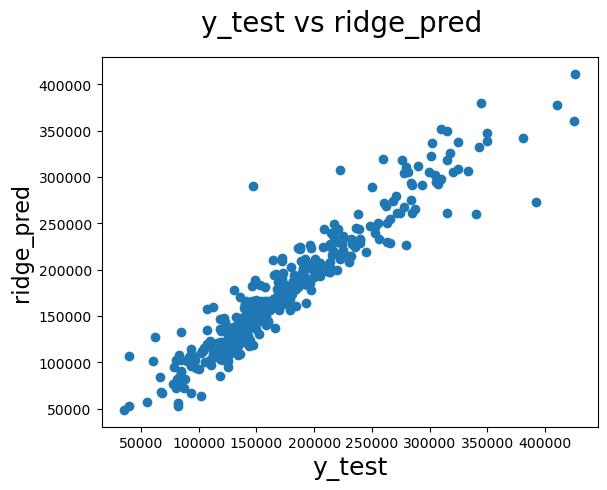

In [238]:
ridge_pred = ridge.predict(X_test)
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

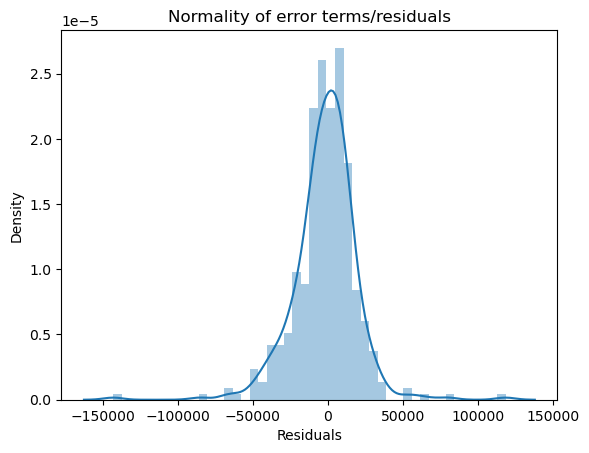

In [239]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [240]:
lasso_pred = lasso.predict(X_test)

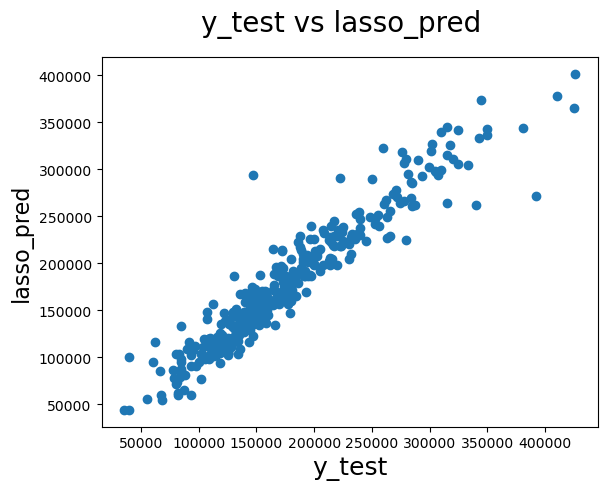

In [241]:
# Plotting y_test and y_pred to observe the spread of lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

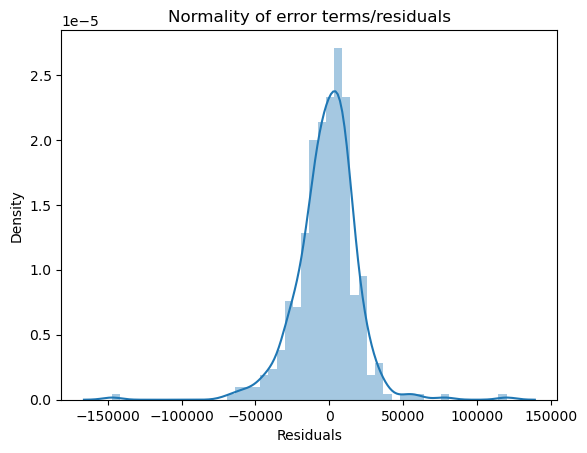

In [242]:
y_res=y_test-lasso_pred
# Plotting the distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [244]:
#What will be the changes in the model if we choose double the value of alpha for both ridge and lasso

alpha = 6
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=6)

In [245]:

y_pred_train = ridge2.predict(X_train)
y_pred_test =  ridge2.predict(X_test)

rdige_metric2 = []

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
rdige_metric2.append(r2_train)


r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
rdige_metric2.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print(rss1)
rdige_metric2.append(rss1)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
rdige_metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rdige_metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rdige_metric2.append(mse_test_lr**0.5)

0.9427713893237888
0.9032057672507707
261482036827.02246
171732013600.78537
296464894.36170346
454317496.298374


In [246]:
# LAsso : Optimum Value of alpha is 200

alpha =200

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train)


y_pred_train = lasso2.predict(X_train)
y_pred_test = lasso2.predict(X_test)

lasso_metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric2.append(mse_test_lr**0.5)

0.9318993730895825
0.903729445929379
311157136672.1149
170802904588.78278
352785869.2427607
451859535.94916075


In [247]:
double_alpha_df = pd.DataFrame(index=X_train.columns)
double_alpha_df.rows = X_train.columns
double_alpha_df['Ridge2'] = ridge2.coef_
double_alpha_df['Ridge'] = ridge.coef_
double_alpha_df['Lasso'] = lasso.coef_
double_alpha_df['Lasso2'] = lasso2.coef_
pd.set_option('display.max_rows', None)
double_alpha_df.head(10)

#most important predictor variables

#OverallQual
#OverallCond
#YearBuilt
#Neighborhood_StoneBr
#Exterior1st_BrkFace
#TotalBsmtSF
#LotArea

,Ridge2,Ridge,Lasso,Lasso2
MSSubClass,-13334.524339,-13465.770388,-16482.818869,-16112.792059
LotFrontage,3912.964101,2860.600941,0.000000,0.000000
LotArea,23314.615076,25650.396463,25985.944681,22765.834605
OverallQual,42607.979793,47874.119066,67576.741685,74680.086970
OverallCond,20607.098443,25882.814103,30778.299866,21543.416978
YearBuilt,14921.187059,22104.938691,31793.533948,22536.610832
YearRemodAdd,13493.024428,11889.788024,12322.456801,15067.127034
MasVnrArea,18807.999029,18019.248739,13941.572602,13712.947540
BsmtFinSF1,34607.918242,38370.720511,29934.955056,29467.281103
BsmtFinSF2,8902.362947,12924.076728,0.000000,0.000000


In [ ]:
#After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [248]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial'], dtype='object', length=228)

In [249]:
X_train_new = X_train.drop(columns=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF'],axis=1)
X_train_new.head(10)

,MSSubClass,LotFrontage,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
546,0.176471,0.167808,0.000000,0.000000,0.157563,0.0,0.355318,0.170968,0.396040,0.0,0.391817,0.0,0.0,0.333333,0.5,0.500000,0.333333,0.333333,0.333333,0.423077,0.50,0.316547,0.000000,0.072658,0.0,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
274,0.000000,0.188356,0.533333,0.000000,0.286765,0.0,0.125406,0.135484,0.000000,0.0,0.123732,0.0,0.0,0.333333,0.0,0.333333,0.333333,0.222222,0.000000,0.730769,0.25,0.189928,0.228261,0.000000,0.0,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1216,0.411765,0.160959,0.466667,0.000000,0.000000,0.0,0.000000,0.315412,0.321232,0.0,0.479214,0.0,0.0,0.666667,0.0,0.666667,0.666667,0.555556,0.000000,0.692308,0.50,0.387770,0.000000,0.000000,0.0,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
793,0.000000,0.188356,0.950000,0.181347,0.000000,0.0,0.694844,0.379211,0.000000,0.0,0.346318,0.0,0.0,0.666667,0.0,0.500000,0.333333,0.444444,0.000000,0.971154,0.50,0.341007,0.228261,0.248566,0.0,...,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
169,0.000000,0.164384,0.516667,0.845855,0.000000,0.0,0.783093,0.454839,0.000000,0.0,0.415385,0.0,0.0,0.666667,0.5,0.333333,0.333333,0.333333,0.333333,0.721154,0.50,0.367626,0.779891,0.122371,0.0,...,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1285,0.176471,0.099315,0.000000,0.000000,0.000000,0.0,0.362285,0.138710,0.322882,0.0,0.318822,0.0,0.0,0.333333,0.0,0.666667,0.333333,0.333333,0.333333,0.317308,0.25,0.201439,0.061141,0.000000,0.0,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
518,0.235294,0.164384,0.800000,0.000000,0.370798,0.0,0.040873,0.159140,0.502750,0.0,0.444517,0.5,0.0,0.666667,0.5,0.500000,0.333333,0.444444,0.000000,0.884615,0.50,0.392806,0.000000,0.068834,0.0,...,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
282,0.588235,0.044521,0.966667,0.215026,0.474790,0.0,0.190432,0.313978,0.000000,0.0,0.286743,0.5,0.0,0.666667,0.0,0.333333,0.333333,0.333333,0.333333,0.980769,0.50,0.450360,0.233696,0.118547,0.0,...,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False
994,0.000000,0.256849,0.950000,0.297927,0.615546,0.0,0.245239,0.458781,0.000000,0.0,0.418985,0.5,0.0,0.666667,0.0,0.500000,0.333333,0.444444,0.333333,0.980769,0.75,0.565468,0.293478,0.091778,0.0,...,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
375,0.058824,0.164384,0.000000,0.000000,0.183824,0.0,0.154668,0.167025,0.000000,0.0,0.152537,0.5,0.0,0.000000,0.5,0.166667,0.333333,0.111111,0.000000,0.711538,0.00,0.000000,0.000000,0.000000,0.0,...,False,True,False,False,False,Tru

In [250]:
X_test_new = X_test.drop(columns=['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF'],axis=1)
X_test_new.head(10)

,MSSubClass,LotFrontage,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
299,0.000000,0.202055,0.900000,0.000000,0.000000,0.0,0.507199,0.255914,0.000000,0.0,0.233715,0.0,0.5,0.333333,0.0,0.500000,0.333333,0.333333,0.333333,0.423077,0.25,0.215827,0.000000,0.068834,0.000000,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
294,0.000000,0.202055,0.050000,0.308290,0.674895,0.0,0.060845,0.432258,0.000000,0.0,0.394763,0.5,0.0,0.333333,0.0,0.500000,0.333333,0.444444,0.666667,0.451923,0.50,0.300719,0.149457,0.000000,0.000000,...,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
142,0.176471,0.171233,0.033333,0.000000,0.266282,0.0,0.187181,0.169176,0.261276,0.0,0.309984,0.0,0.0,0.666667,0.0,0.666667,0.333333,0.333333,0.000000,0.903846,0.50,0.517986,0.000000,0.000000,0.000000,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
377,0.235294,0.277397,0.916667,0.000000,0.000000,0.0,0.733860,0.409319,0.487349,0.0,0.663830,0.0,0.0,1.000000,0.0,0.666667,0.333333,0.555556,0.333333,0.942308,0.50,0.438849,0.216033,0.409178,0.000000,...,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1114,0.000000,0.236301,0.833333,0.000000,0.217962,0.0,0.194148,0.141577,0.000000,0.0,0.129296,0.0,0.0,0.333333,0.0,0.333333,0.333333,0.111111,0.000000,0.471154,0.25,0.234532,0.000000,0.000000,0.000000,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
820,0.235294,0.174658,0.883333,0.000000,0.000000,0.0,0.370646,0.129032,0.463146,0.0,0.393453,0.0,0.0,0.666667,0.5,0.500000,0.333333,0.333333,0.000000,0.932692,0.50,0.428058,0.000000,0.086042,0.000000,...,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
1214,0.382353,0.164384,0.200000,0.000000,0.411765,0.0,0.065490,0.201075,0.000000,0.0,0.183633,0.5,0.0,0.333333,0.0,0.500000,0.333333,0.333333,0.000000,0.538462,0.25,0.215827,0.203804,0.137667,0.000000,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
778,0.411765,0.133562,0.450000,0.414508,0.000000,0.0,0.000000,0.567025,0.000000,0.0,0.517840,0.0,0.0,0.666667,0.0,0.666667,0.666667,0.777778,0.666667,0.682692,0.50,0.453237,0.000000,0.000000,0.000000,...,False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False
497,0.176471,0.133562,0.000000,0.000000,0.172794,0.0,0.323734,0.249104,0.377888,0.0,0.452373,0.5,0.0,0.666667,0.0,0.666667,0.333333,0.555556,0.000000,0.182692,0.25,0.172662,0.000000,0.191205,0.000000,...,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
30,0.294118,0.099315,0.000000,0.000000,0.000000,0.0,0.301440,0.075627,0.367437,0.0,0.287725,0.0,0.0,0.333333,0.0,0.500000,0.333333,0.333333,0.000000,0.134615,0.25,0.179856,0.000000,0.103

In [251]:
#Optimum Value of alpha is 100

alpha =100

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train_new, y_train)


y_pred_train = lasso3.predict(X_train_new)
y_pred_test = lasso3.predict(X_test_new)

lasso_metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
lasso_metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
lasso_metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
lasso_metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
lasso_metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
lasso_metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
lasso_metric3.append(mse_test_lr**0.5)

0.9327440461135403
0.8888133673611915
307297758991.13354
197266962774.75708
348410157.5863192
521870271.89089173


In [252]:
# R2 calculation
alpha = 4
ridge3 = Ridge(alpha=alpha)
ridge3.fit(X_train_new, y_train)
y_pred_train = ridge3.predict(X_train_new)
y_pred_test =  ridge3.predict(X_test_new)

rdige_metric3 = []

r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
rdige_metric3.append(r2_train)


r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
rdige_metric3.append(r2_test)

rss1 = np.sum(np.square(y_train - y_pred_train))
print(rss1)
rdige_metric3.append(rss1)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
rdige_metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
rdige_metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
rdige_metric3.append(mse_test_lr**0.5)

0.9391272900323153
0.8916471194941187
278132213965.26416
192239328937.37872
315342646.2191204
508569653.2734887


In [253]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(rdige_metric3, name = 'Ridge Regression')
ls_metric = pd.Series(lasso_metric2, name = 'Lasso Regression')

final_metric2 = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric2

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.391273e-01,9.318994e-01
1,R2 Score (Test),8.916471e-01,9.037294e-01
2,RSS (Train),2.781322e+11,3.111571e+11
3,RSS (Test),1.922393e+11,1.708029e+11
4,MSE (Train),1.775789e+04,1.878259e+04
5,MSE (Test),2.255149e+04,2.125699e+04


In [254]:
#important predictor variables
betas = pd.DataFrame(index=X_train_new.columns)
betas.rows = X_train_new.columns
betas['Lasso3'] = lasso3.coef_
pd.set_option('display.max_rows', None)
betas.head(15)

# 5 important predictor variables now after dropping five most important predictor variables and recreating

#-LotFrontage
#-MasVnrArea
#-BsmtFinSF1
#-GrLivArea
#-YearRemodAdd

,Lasso3
MSSubClass,-20978.803715
LotFrontage,0.000000
YearRemodAdd,18824.897632
MasVnrArea,17672.701546
BsmtFinSF1,46658.150874
BsmtFinSF2,7006.294887
BsmtUnfSF,18628.282743
1stFlrSF,16010.388875
2ndFlrSF,0.000000
LowQualFinSF,-17141.275881
